In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# a nice way of filtering out deprecated warnings
import warnings
warnings.filterwarnings("ignore")
df = pd.read_feather("../preprocessed_data/taxi_add_weather_19.feather").drop("index",axis = 1)

In [2]:
#use July as sample
start_date = "2019-07-01"
end_date = "2019-07-31"
after_start_date = df["DATE"] >= start_date
before_end_date = df["DATE"] <= end_date
between_two_dates = after_start_date & before_end_date
July= df.loc[between_two_dates]
July["DATE"] = July["tpep_pickup_datetime"].str[5:10]


In [3]:
July

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,...,DATE,avg_wind_speed,Rainfall,SNOW,Snow_depth,Max_temp,Min_temp,Thunder,WEEKDAY,weekend
11200176,2019-07-01 17:02:05,2019-07-01 17:17:10,1.0,3.24,1.0,90,142,13.5,2.00,16.80,...,07-01,0.00,0.0,0.0,0.0,34,25,0.0,0,False
11200177,2019-07-01 17:21:00,2019-07-01 17:23:37,1.0,0.73,1.0,142,43,4.5,0.00,5.80,...,07-01,0.00,0.0,0.0,0.0,34,25,0.0,0,False
11200178,2019-07-01 17:37:03,2019-07-01 17:42:23,1.0,1.37,1.0,48,68,6.0,1.00,8.30,...,07-01,0.00,0.0,0.0,0.0,34,25,0.0,0,False
11200179,2019-07-01 17:44:00,2019-07-01 17:51:05,1.0,1.45,1.0,68,246,7.0,1.00,9.30,...,07-01,0.00,0.0,0.0,0.0,34,25,0.0,0,False
11200180,2019-07-01 17:55:52,2019-07-01 17:58:37,1.0,0.45,1.0,246,50,4.0,0.00,5.30,...,07-01,0.00,0.0,0.0,0.0,34,25,0.0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14971811,2019-07-29 23:42:14,2019-07-30 00:18:30,2.0,19.85,2.0,132,239,52.0,10.00,71.42,...,07-29,4.47,0.0,0.0,0.0,90,73,0.0,0,False
14971812,2019-07-29 23:45:36,2019-07-30 00:18:08,1.0,18.95,2.0,132,113,52.0,15.36,76.78,...,07-29,4.47,0.0,0.0,0.0,90,73,0.0,0,False
14971813,2019-07-29 23:59:58,2019-07-30 00:27:35,5.0,18.08,2.0,132,100,52.0,12.28,73.70,...,07-29,4.47,0.0,0.0,0.0,90,73,0.0,0,False
14971814,2019-07-29 23:54:55,2019-07-30 00:29:46,4.0,18.99,2.0,132,230,52.0,0.00,55.30,...,07-29,4.47,0.0,0.0,0.0,90,73,0.0,0,False


In [4]:
sample = July.sample(n=int(July.shape[0]/20))

0.5495859502559894


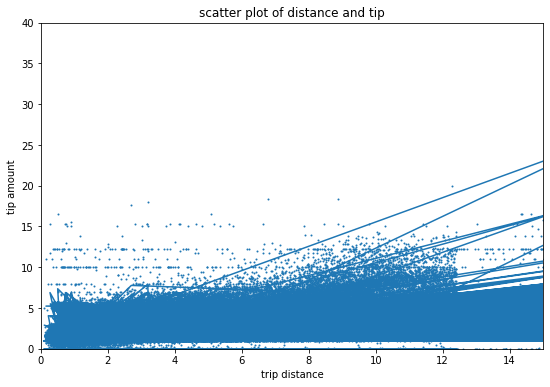

In [5]:
corr = np.corrcoef(sample["trip_distance"],sample["tip_amount"])[0][1]
print(corr)

plt.figure(figsize = (9,6))
plt.scatter(sample["trip_distance"],sample["tip_amount"],s=1,alpha = 1)
m,b =np.polyfit(sample["trip_distance"],sample["tip_amount"],1)
plt.plot(sample["trip_distance"],m*sample["tip_amount"]+b)

plt.title("scatter plot of distance and tip")
plt.xlabel("trip distance")
plt.ylabel("tip amount")
plt.xlim([0,15])
plt.ylim([0,40])
plt.show()


In [6]:
#tip by time
tips_count = July.groupby("DATE")["tip_amount"].sum()
date_count = July["DATE"].value_counts().sort_index()
avg_tip = tips_count/date_count              

In [8]:
avg_tip

DATE
07-01    1.974374
07-02    1.936767
07-03    1.931606
07-04    1.736891
07-05    1.660237
07-06    1.778392
07-07    2.149311
07-08    2.185393
07-09    2.132765
07-10    2.130744
07-11    2.175606
07-12    2.165367
07-13    2.001395
07-14    2.053911
07-15    2.132330
07-16    2.155068
07-17    2.146326
07-18    2.275508
07-19    2.102245
07-20    1.868356
07-21    1.964252
07-22    2.129293
07-23    2.188346
07-24    2.188157
07-25    2.207917
07-26    2.114265
07-27    1.899643
07-28    2.032882
07-29    2.076257
07-30    2.119196
07-31    2.176593
dtype: float64

In [10]:
df = pd.read_feather("../preprocessed_data/taxi_add_weather_19.feather").drop("index",axis = 1)
df = df.drop(columns = "final_amount")

In [16]:
df

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,tip_amount,total_amount,...,avg_wind_speed,Rainfall,SNOW,Snow_depth,Max_temp,Min_temp,Thunder,WEEKDAY,weekend,hour
0,2019-01-01 00:46:40,2019-01-01 00:53:20,1.0,1.50,1.0,151,239,7.0,1.65,9.95,...,0.00,0.06,0.0,0.0,58,39,0.0,1,False,0
1,2019-01-01 00:59:47,2019-01-01 01:18:59,1.0,2.60,1.0,239,246,14.0,1.00,16.30,...,0.00,0.06,0.0,0.0,58,39,0.0,1,False,0
2,2019-01-01 00:21:28,2019-01-01 00:28:37,1.0,1.30,1.0,163,229,6.5,1.25,9.05,...,0.00,0.06,0.0,0.0,58,39,0.0,1,False,0
3,2019-01-01 00:32:01,2019-01-01 00:45:39,1.0,3.70,1.0,229,7,13.5,3.70,18.50,...,0.00,0.06,0.0,0.0,58,39,0.0,1,False,0
4,2019-01-01 00:57:32,2019-01-01 01:09:32,2.0,2.10,1.0,141,234,10.0,1.70,13.00,...,0.00,0.06,0.0,0.0,58,39,0.0,1,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19350141,2019-10-31 23:02:44,2019-10-31 23:12:38,1.0,7.27,2.0,56,170,52.0,4.00,65.42,...,5.14,0.54,0.0,0.0,71,60,0.0,3,False,23
19350142,2019-10-31 23:39:40,2019-11-01 00:06:07,1.0,16.43,2.0,132,170,52.0,0.00,55.30,...,5.14,0.54,0.0,0.0,71,60,0.0,3,False,23
19350143,2019-10-31 23:36:36,2019-11-01 00:10:47,1.0,18.30,2.0,132,148,52.0,11.06,66.36,...,5.14,0.54,0.0,0.0,71,60,0.0,3,False,23
19350144,2019-10-31 23:05:41,2019-10-31 23:37:52,1.0,18.34,2.0,132,262,52.0,0.00,61.42,...,5.14,0.54,0.0,0.0,71,60,0.0,3,False,23


In [11]:
#convert the pickup and dropoff date and time to  datetime64[ns]
df["tpep_dropoff_datetime"] = pd.to_datetime(df["tpep_dropoff_datetime"])
df["tpep_pickup_datetime"] = pd.to_datetime(df["tpep_pickup_datetime"])

df["DATE"] = df["tpep_pickup_datetime"].dt.normalize()
df["hour"] = df["tpep_pickup_datetime"].dt.hour

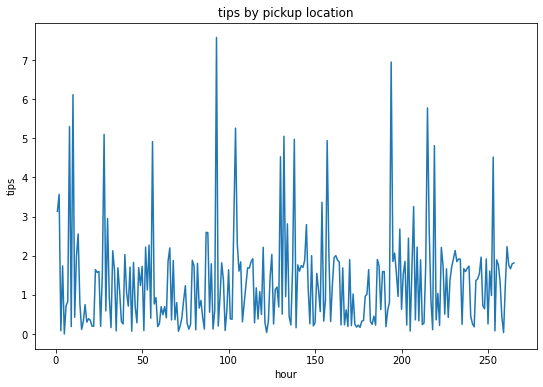

In [30]:
plt.figure(figsize = (9,6))
tip = df.groupby("PULocationID").mean()["tip_amount"]
plt.plot(tip.index,tip)
plt.ylabel("tips")
plt.xlabel("hour")
plt.title("tips by pickup location")
plt.show()

In [33]:
top15_tips = df.groupby("PULocationID").mean()["tip_amount"].nlargest(15)

In [34]:
top15_tips

PULocationID
93     7.578320
194    6.951634
10     6.114677
215    5.776933
8      5.300981
104    5.260000
28     5.098846
132    5.053469
138    4.977221
157    4.942744
56     4.916194
219    4.813464
130    4.527950
253    4.522439
2      3.567500
Name: tip_amount, dtype: float64